In [ ]:
import pandas as pd


from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

import scikitplot as skplt
import matplotlib.pyplot as plt

import sys
sys.path.append('../../data/')
import cleaner as dc


In [2]:
df_train = pd.read_csv("./data/authority_train_dataset.csv")
df_test = pd.read_csv("./data/authority_test_dataset.csv")

print(df_train.shape)
print(df_test.shape)

(4071, 2)
(570, 2)


In [3]:
# Cleaning and lemmatizing the traning and testing datasets

# Lower case
df_train['ad']= df_train['ad'].apply(lambda x: x.lower())
df_test['ad']= df_test['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_train['ad']= df_train['ad'].str.replace('[^\w\s]','', regex=True)
df_test['ad']= df_test['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_train['ad']= df_train['ad'].str.replace('\d+','',regex=True)
df_test['ad']= df_test['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df_train['ad']= df_train['ad'].str.replace('\s+', ' ',  regex=True)
df_test['ad']= df_test['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df_train['ad']= df_train['ad'].apply(dc.denoise_text)
df_test['ad']= df_test['ad'].apply(dc.denoise_text)

#Apply function on review column
df_train['ad']= df_train['ad'].apply(dc.remove_stopwords)
df_test['ad']= df_test['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_train['ad']= df_train['ad'].apply(dc.remove_special_characters)
df_test['ad']= df_test['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df_train['ad']= df_train['ad'].apply(dc.simple_lemmatizer)
df_test['ad']= df_test['ad'].apply(dc.simple_lemmatizer)


In [4]:
X_train, X_test, y_train, y_test = df_train['ad'], df_test['ad'], df_train['authority'], df_test['authority']

In [5]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [6]:
# Create and train the model
clf = RandomForestClassifier(
    n_estimators=100
    )
    
clf.fit(X_train_tf,y_train)

RandomForestClassifier()

accuracy:   0.889
              precision    recall  f1-score   support

no authority       0.98      0.86      0.91       389
   authority       0.76      0.96      0.85       181

    accuracy                           0.89       570
   macro avg       0.87      0.91      0.88       570
weighted avg       0.91      0.89      0.89       570

confusion matrix:
[[333  56]
 [  7 174]]



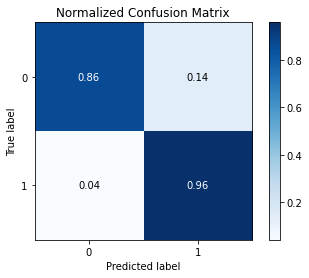

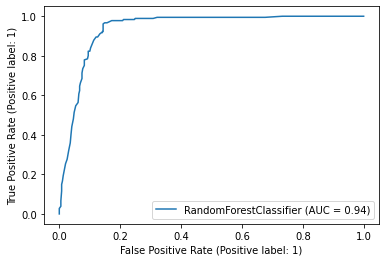

In [8]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [9]:
df_val = pd.read_csv('data/sample.csv')

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','', regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ', regex=True)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.simple_lemmatizer)

accuracy:   0.812
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       113
           1       0.66      0.91      0.76        57

    accuracy                           0.81       170
   macro avg       0.80      0.84      0.80       170
weighted avg       0.85      0.81      0.82       170

confusion matrix:
[[86 27]
 [ 5 52]]



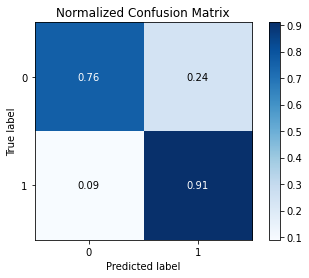

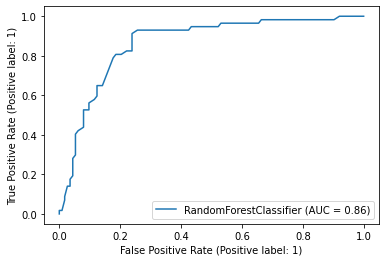

In [10]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['authority']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ '0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)